# 滴滴出行A/B测试&城市运营分析

## 项目背景

### 1 背景

利用A/B测试的方法，来对滴滴出行的不同方案进行有效性判别，得出有益的见解，并支持下一步的产品迭代以及领导决策。

### 2 数据说明

数据集分为test.xlsx与city.xlsx两部分：

其中test.xlsx为滴滴出行某次A/B测试结果数据，有日期、组别、订单请求数、GMV、每单优惠券金额、订单数、取消请求数等字段。

city.xlsx为某城市运营数据，有日期、时点、订单请求数、订单数、可服务时长、平均订单时长、顾客预计等待时间、顾客实际等待时间、司机在忙率等字段。

test.xlsx数据可以用来判断实验条件对此次A/B测试的结果影响是否显著；city.xlsx数据可以用来探索该城市运营中出现的问题，根据关键结论辅助决策。

## 一、A/B测试效果分析

### 1 数据导入

In [2]:
#A/B测试结果数据导入

import pandas as pd

test = pd.read_excel('test.xlsx')
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests
0,2019-01-01,control,30,7486.620,1.069746,24,1
1,2019-01-02,control,152,38301.575,1.044199,121,8
2,2019-01-03,control,267,67768.425,1.032276,215,14
3,2019-01-04,control,369,94992.900,1.028196,298,19
4,2019-01-05,control,478,123236.875,1.011807,390,24


### 2 计算ROI

In [3]:
#计算优惠券投入相对gmv的ROI

test['ROI']=test['gmv']/(test['coupon per trip']*test['trips'])
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,ROI
0,2019-01-01,control,30,7486.620,1.069746,24,1,291.604269
1,2019-01-02,control,152,38301.575,1.044199,121,8,303.143166
2,2019-01-03,control,267,67768.425,1.032276,215,14,305.346684
3,2019-01-04,control,369,94992.900,1.028196,298,19,310.026761
4,2019-01-05,control,478,123236.875,1.011807,390,24,312.304607


### 3 requests检验

数据共58条，对照组与实验组各29条，样本量小于30。

#### 3.1 requests方差检验

记两组requests方差分别为c1,c2

零假设H0：c1=c2；备选假设H1：c1≠c2

显著性水平取0.05

In [5]:
#levene检验requests是否齐方差

requests_A=test[test.group=='control'].requests
requests_B=test[test.group=='experiment'].requests

import scipy.stats as st

st.levene(requests_A,requests_B)

LeveneResult(statistic=0.014685075667736849, pvalue=0.903980667108546)

p值大于0.05，不拒绝原假设，因此可认为两组实验requests齐方差。

#### 3.2 requests均值检验

该数据为同一样本实验前后的不同水平，因此选用配对样本t检验。

记两组requests均值分别为u1,u2

零假设H0：u1=u2；备选假设H1：u1≠u2

显著性水平取0.05

In [7]:
#配对样本t检验

st.ttest_rel(requests_A,requests_B)

TtestResult(statistic=1.6436140982479508, pvalue=0.11143970454099936, df=28)

p值大于0.05，不拒绝原假设，因此可认为实验条件对requests影响不显著。

### 4 gmv检验

同理对gmv进行方差和均值检验。

#### 4.1 gmv方差检验

In [8]:
#levene检验gmv是否齐方差

gmv_A=test[test.group=='control'].gmv
gmv_B=test[test.group=='experiment'].gmv

st.levene(gmv_A,gmv_B)

LeveneResult(statistic=0.02865341299111212, pvalue=0.8661917430097603)

p值大于0.05，不拒绝原假设，因此可认为两组实验gmv齐方差。

#### 4.2 gmv均值检验

In [9]:
#配对样本t检验

st.ttest_rel(gmv_A,gmv_B)

TtestResult(statistic=4.247583846321442, pvalue=0.00021564303983362577, df=28)

p值小于0.05，拒绝原假设，因此可认为实验条件对gmv有显著影响。

### 5 ROI检验

同理对ROI进行方差和均值检验。

#### 5.1 ROI方差检验

In [11]:
#levene检验ROI是否齐方差

ROI_A=test[test.group=='control'].ROI
ROI_B=test[test.group=='experiment'].ROI

st.levene(ROI_A,ROI_B)

LeveneResult(statistic=0.10363884745479335, pvalue=0.7487044961896305)

p值大于0.05，不拒绝原假设，因此可认为两组实验ROI齐方差。

#### 5.2 ROI均值检验

In [12]:
#配对样本t检验

st.ttest_rel(ROI_A,ROI_B)

TtestResult(statistic=10.305504459268173, pvalue=4.93261342734923e-11, df=28)

p值小于0.05，拒绝原假设，因此可认为实验条件对ROI有显著影响。

## 二、城市运营分析

### 1 数据导入

In [14]:
#导入该城市运营相关数据

city = pd.read_excel('city.xlsx')
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


In [15]:
#查看数据有无缺失值

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      90 non-null     datetime64[ns]
 1   hour                      90 non-null     int64         
 2   requests                  90 non-null     int64         
 3   trips                     90 non-null     int64         
 4   supply hours              90 non-null     float64       
 5   average minutes of trips  90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   utiliz                    90 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 6.5 KB


### 2 数据探索

#### 2.1 单量最多的时间点

In [22]:
req_hour = city.groupby(['hour']).agg({'requests':sum})
req_hour

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\356272351.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  req_hour = city.groupby(['hour']).agg({'requests':sum})


,requests
hour,
11,6008
12,8530
13,6559


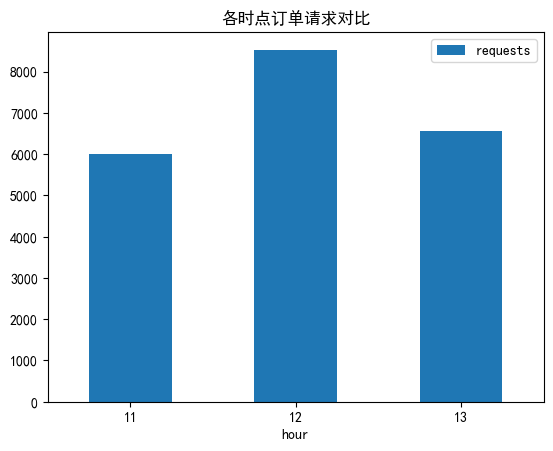

In [24]:
#绘制各时点订单请求柱状图

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

req_hour.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('各时点订单请求对比')

plt.show()

可见，在11、12、13这三个时间点内，12点用户发起订单的需求是最大的，其次是13点，11点。

司机运营平台应考虑加大该时点车辆供应。

#### 2.2 单量最多的日期

In [26]:
req_date = city.groupby(['date']).agg({'requests':sum})
req_date.sort_values('date').head()

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\444324826.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  req_date = city.groupby(['date']).agg({'requests':sum})


,requests
date,
2013-09-01,206
2013-09-02,604
2013-09-03,238
2013-09-04,199
2013-09-05,782


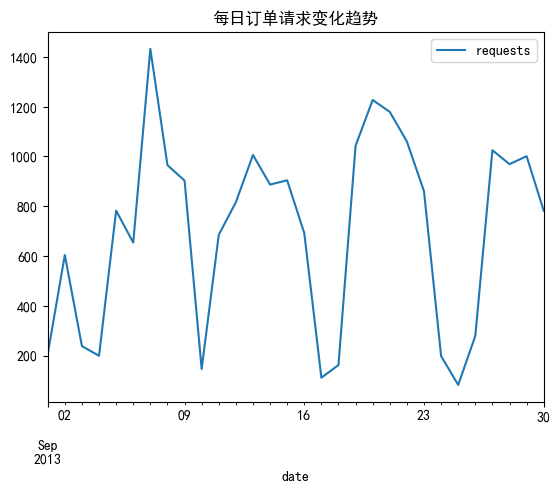

In [27]:
#绘制订单请求数随日期变化的折线图

req_date.plot(kind='line')
plt.title('每日订单请求变化趋势')

plt.show()

单月订单请求数随日期的变化呈周期性变化，我们猜测4个峰值分别对应4个周末，周末用户出行需求较大。

经验证发现猜想与数据吻合，因此司机运营平台应考虑加大周末、节假日的车辆供给。

#### 2.3 各时段订单完成率

In [28]:
com_hour = city.groupby(['hour']).agg({'requests':sum,'trips':sum})
com_hour['rate']=com_hour['trips']/com_hour['requests']
com_hour

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\1853639773.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  com_hour = city.groupby(['hour']).agg({'requests':sum,'trips':sum})


,requests,trips,rate
hour,,,
11,6008,4550,0.757324
12,8530,5850,0.685815
13,6559,3085,0.470346


13点订单需求较多，但订单完成率仅47%，说明较多订单没有得到及时相应。

客运部应重点关注13点订单相应时长，排查具体原因。

#### 2.4 单月每日订单完成率

In [29]:
com_date = city.groupby(['date']).agg({'requests':sum,'trips':sum})
com_date['rate']=com_date['trips']/com_date['requests']
com_date.sort_values('date').head()

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\1204053157.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  com_date = city.groupby(['date']).agg({'requests':sum,'trips':sum})


,requests,trips,rate
date,,,
2013-09-01,206,146,0.708738
2013-09-02,604,487,0.806291
2013-09-03,238,83,0.348739
2013-09-04,199,102,0.512563
2013-09-05,782,532,0.680307


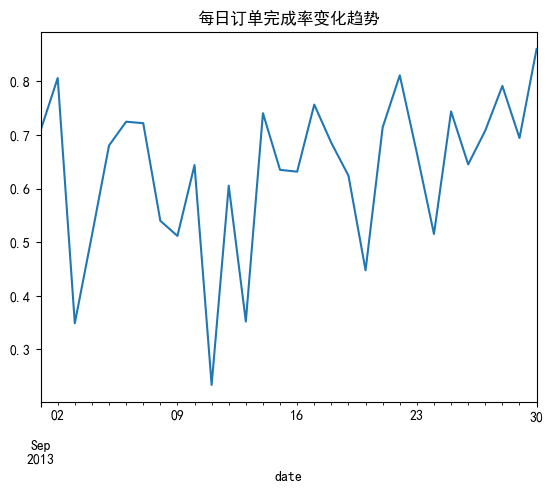

In [30]:
#绘制订单完成率随日期变化的折线图

com_date.rate.plot(kind='line')
plt.title('每日订单完成率变化趋势')

plt.show()

单月每日订单完成率规律不太明显，但几个谷值基本都出现在周末附近，说明客户出行需求的提升可能导致司机数量相对短缺，从而致使响应率的降低。

#### 2.5 顾客等待时间

In [31]:
import numpy as np

eta_hour = city.groupby(['hour']).agg({'pETA':np.mean,'aETA':np.mean})
eta_hour

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\1768499718.py:3: FutureWarning: The provided callable <function mean at 0x0000017D5D9B0FE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  eta_hour = city.groupby(['hour']).agg({'pETA':np.mean,'aETA':np.mean})


,pETA,aETA
hour,,
11,5.397333,6.611000
12,5.860000,7.253333
13,6.018333,7.732667


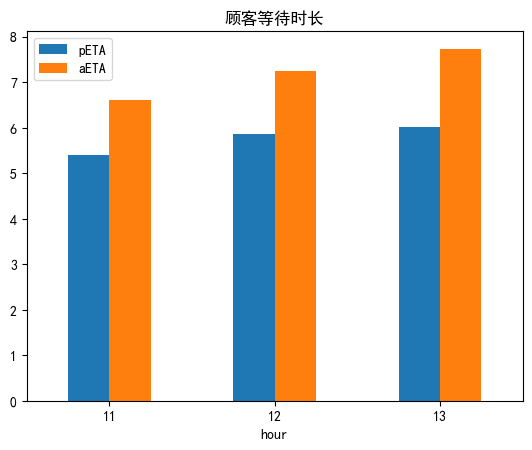

In [32]:
#绘制顾客等待时长复合柱状图

eta_hour.plot(kind='bar')
plt.title('顾客等待时长')
plt.xticks(rotation=0)

plt.show()

以上可见，无论哪个时点，用户实际等待时长均明显大于用户预计等待时长。

各时点用户等待时长差异不明显，但13点最高。

客运部一方面应提升用户预计等待时长的准确性，另一方面优化平台派单逻辑等。

#### 2.6 司机在忙率

In [33]:
city['busy'] = city['supply hours']*city['utiliz']
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz,busy
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240,20.43
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297,15.53
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503,17.76
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187,31.47
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814,38.68


In [34]:
busy_hour = city.groupby(['hour']).agg({'supply hours':sum,'busy':sum})
busy_hour['utiliz'] = busy_hour['busy']/busy_hour['supply hours']
busy_hour

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\1056537297.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  busy_hour = city.groupby(['hour']).agg({'supply hours':sum,'busy':sum})


,supply hours,busy,utiliz
hour,,,
11,1660.01,768.51,0.462955
12,1818.03,1115.28,0.613455
13,1274.60,730.83,0.573380


12点司机在忙总时长最长，在忙率也最高，用户订单请求也最多，说明车辆总数偏少。

#### 2.7 订单时长

In [35]:
trip_min = city.groupby(['hour']).agg({'average minutes of trips':np.mean})
trip_min

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\3541132931.py:1: FutureWarning: The provided callable <function mean at 0x0000017D5D9B0FE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  trip_min = city.groupby(['hour']).agg({'average minutes of trips':np.mean})


,average minutes of trips
hour,
11,25.617
12,37.176
13,24.361


12点用户订单需求较多，同时订单时长最长，说明这个时间点是一个非常重要的时间点。

In [36]:
supply_hour = city.groupby(['hour']).agg({'supply hours':np.mean})
supply_hour

C:\Users\kyyk\AppData\Local\Temp\ipykernel_2720\3708972554.py:1: FutureWarning: The provided callable <function mean at 0x0000017D5D9B0FE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  supply_hour = city.groupby(['hour']).agg({'supply hours':np.mean})


,supply hours
hour,
11,55.333667
12,60.601000
13,42.486667


13点订单量也较大，但此时点司机服务时长较短。

为优化用户出行体验，司机运营平台可联合客运部可考虑此时段尽量分配总服务时长较长的司机来接单（经验较为丰富）。

### 3 后续思考方向

提升顾客预计等待时长预测准确度（需要历史数据进行预测）

加大车辆投入（分车辆不同等级来看，因此可能需要车辆相关信息表）

优化用户体验（需要客诉相关数据）

优化平台派单逻辑（需要订单的位置相关数据）

个性化需求（需要用户属性、及其他行为数据）